In [4]:
import yfinance as yf
start_date='2019-10-25'
end_date='2022-10-26'
ticker='RELIANCE.NS'
df=yf.download(ticker,start_date,end_date)
df.to_csv("Reliance_stock_price.csv")

[*********************100%***********************]  1 of 1 completed


In [76]:
import pandas as pd
df=pd.read_csv('Reliance_stock_price.csv')

In [77]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
742,2022-10-19,2454.500000,2527.850098,2441.699951,2493.899902,2493.899902,8882553
743,2022-10-20,2485.000000,2519.000000,2485.000000,2500.600098,2500.600098,4022919
744,2022-10-21,2507.699951,2516.800049,2467.000000,2471.600098,2471.600098,3804352
745,2022-10-24,2460.000000,2502.500000,2455.300049,2479.850098,2479.850098,1555270
746,2022-10-25,2499.000000,2499.000000,2438.000000,2441.550049,2441.550049,5645639


In [78]:
df_1=df['Close']

In [79]:
df_1.shape

(747,)

<AxesSubplot:>

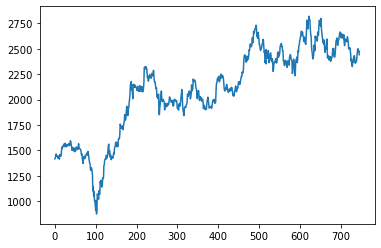

In [111]:
import matplotlib.pyplot as plt
df_1.plot()

In [81]:
m=df_1.max()
m

2819.85009765625

In [82]:
df1=df_1/m

In [83]:
import numpy as np
df=np.array(df1).reshape(-1,1)

In [84]:
df.shape

(747, 1)

In [85]:
train_size=int(len(df)*0.65)
test_size=len(df*0.35)
train_data=df[0:train_size]
test_data=df[train_size:len(df)]

In [86]:
train_data.shape,test_data.shape

((485, 1), (262, 1))

In [87]:
def create_data_set(dataset,time_stamp):
    X,Y=[],[]
    for i in range(len(dataset)-time_stamp-1):
        a=dataset[i:i+time_stamp,0]
        X.append(a)
        Y.append(dataset[i+time_stamp,0])
    return np.array(X),np.array(Y)

In [88]:
#time_stamp=30
X_train,Y_train=create_data_set(train_data,30)
X_test,Y_test=create_data_set(test_data,30)

In [89]:
X_train.shape,X_test.shape

((454, 30), (231, 30))

In [90]:
X_test=np.expand_dims(X_test,axis=2)
X_train=np.expand_dims(X_train,axis=2)


In [91]:
X_train.shape,X_test.shape

((454, 30, 1), (231, 30, 1))

In [92]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense



In [97]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))


In [98]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 50)            10400     
                                                                 
 lstm_10 (LSTM)              (None, 30, 50)            20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics='mae')

C:\Users\HOME\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [100]:
f=model.fit(X_train,Y_train,batch_size=8,epochs=10)

Epoch 1/10
57/57 [==============================] - 24s 89ms/step - loss: 0.0574 - mae: 0.1458
Epoch 2/10
57/57 [==============================] - 6s 99ms/step - loss: 0.0026 - mae: 0.0385
Epoch 3/10
57/57 [==============================] - 6s 97ms/step - loss: 0.0015 - mae: 0.0304
Epoch 4/10
57/57 [==============================] - 6s 105ms/step - loss: 0.0012 - mae: 0.0272
Epoch 5/10
57/57 [==============================] - 6s 100ms/step - loss: 0.0014 - mae: 0.0291
Epoch 6/10
57/57 [==============================] - 6s 106ms/step - loss: 0.0013 - mae: 0.0275
Epoch 7/10
57/57 [==============================] - 6s 99ms/step - loss: 0.0016 - mae: 0.0314
Epoch 8/10
57/57 [==============================] - 6s 108ms/step - loss: 9.7627e-04 - mae: 0.0253
Epoch 9/10
57/57 [==============================] - 5s 93ms/step - loss: 0.0013 - mae: 0.0274
Epoch 10/10
57/57 [==============================] - 7s 117ms/step - loss: 8.4980e-04 - mae: 0.0236


In [101]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [102]:
df_m=pd.DataFrame(f.history)

<AxesSubplot:>

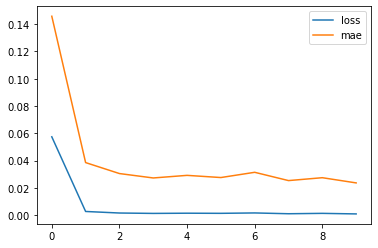

In [103]:
df_m.plot()

In [104]:
train_predict=m*train_pred
test_predict=m*test_pred
train_predict,

(array([[1567.4408 ],
        [1563.0381 ],
        [1559.4614 ],
        [1556.945  ],
        [1555.8114 ],
        [1556.853  ],
        [1558.7737 ],
        [1560.452  ],
        [1562.1907 ],
        [1566.2023 ],
        [1571.9846 ],
        [1576.8086 ],
        [1577.7998 ],
        [1572.5538 ],
        [1563.5951 ],
        [1553.5596 ],
        [1542.5933 ],
        [1531.352  ],
        [1522.4376 ],
        [1517.0588 ],
        [1512.9729 ],
        [1510.6084 ],
        [1509.1266 ],
        [1510.3239 ],
        [1514.2811 ],
        [1519.9578 ],
        [1525.2327 ],
        [1528.6178 ],
        [1530.6195 ],
        [1534.4486 ],
        [1537.753  ],
        [1539.5813 ],
        [1539.6434 ],
        [1537.8044 ],
        [1534.2395 ],
        [1528.6932 ],
        [1519.646  ],
        [1508.3167 ],
        [1494.1437 ],
        [1476.4166 ],
        [1455.078  ],
        [1434.7771 ],
        [1419.9094 ],
        [1412.6714 ],
        [1411.1598 ],
        [1

In [115]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train*m,train_predict))

66.53980297901896

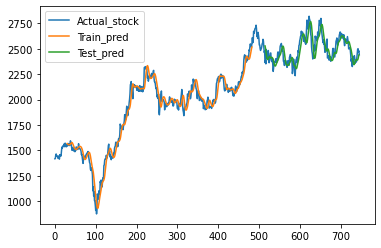

In [116]:

look_back=30
Train_predict=np.empty_like(df)
Train_predict[:,:]=np.nan
Train_predict[look_back:len(train_pred)+look_back,:]=train_predict
Test_predict=np.empty_like(df)
Test_predict[:,:]=np.nan
Test_predict[len(train_pred)+2*(look_back)+1:len(df)-1,:]=test_predict
plt.plot(df*m)
plt.plot(Train_predict)
plt.plot(Test_predict)
plt.legend(['Actual_stock','Train_pred','Test_pred'])

